In [1]:
# Importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Problem Statement
- Build reliable classification models to predict if customers will make transaction in the future based on there previous transcation records

# Data Collecting

In [2]:
df=pd.read_csv('Data/train(1).csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# Basic checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [4]:
df.shape

(200000, 202)

In [5]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


### Observation
- There are 200000 rows and 202 columns
- target feature value have 0(customer do not make transaction) and 1(customer make transcation)
- features are named from var_0,var_1 to var_199
- All the features are numerical
- target variable is binary

# Data Preprocessing

In [5]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [6]:
# Irrelevant column unique identification key is 'ID_code' So we drop this column
df = df.drop(columns='ID_code')

In [7]:
df.dtypes.value_counts()

float64    200
int64        1
Name: count, dtype: int64

### Observation
- There are no null values in entire dataset
- There is No duplicated rows 
- All columns of of type Numerical so need to change data type

# EDA

In [8]:
df.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

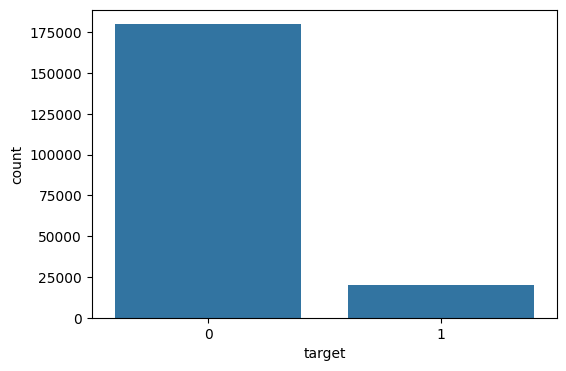

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'])
plt.show()

### Obsevaton
- It is a binary classification problem
- In this plot we are clearly seen the 90% customer are did not do a transaction and 10% customer are did do the transaction
- The result shows the majority(90%) of tansaction data belongs to class 0, indicating dataset is highly imbalanced . 
- So this may leads to poor performance on minority class
- to tackle this issue , i will use oversampling tecnique(SMOTE) to create synthetic examples from the minority class to ensure the balance

In [11]:
numerical_col=df.select_dtypes(include=['float']).columns
numerical_col

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

Distributions columns


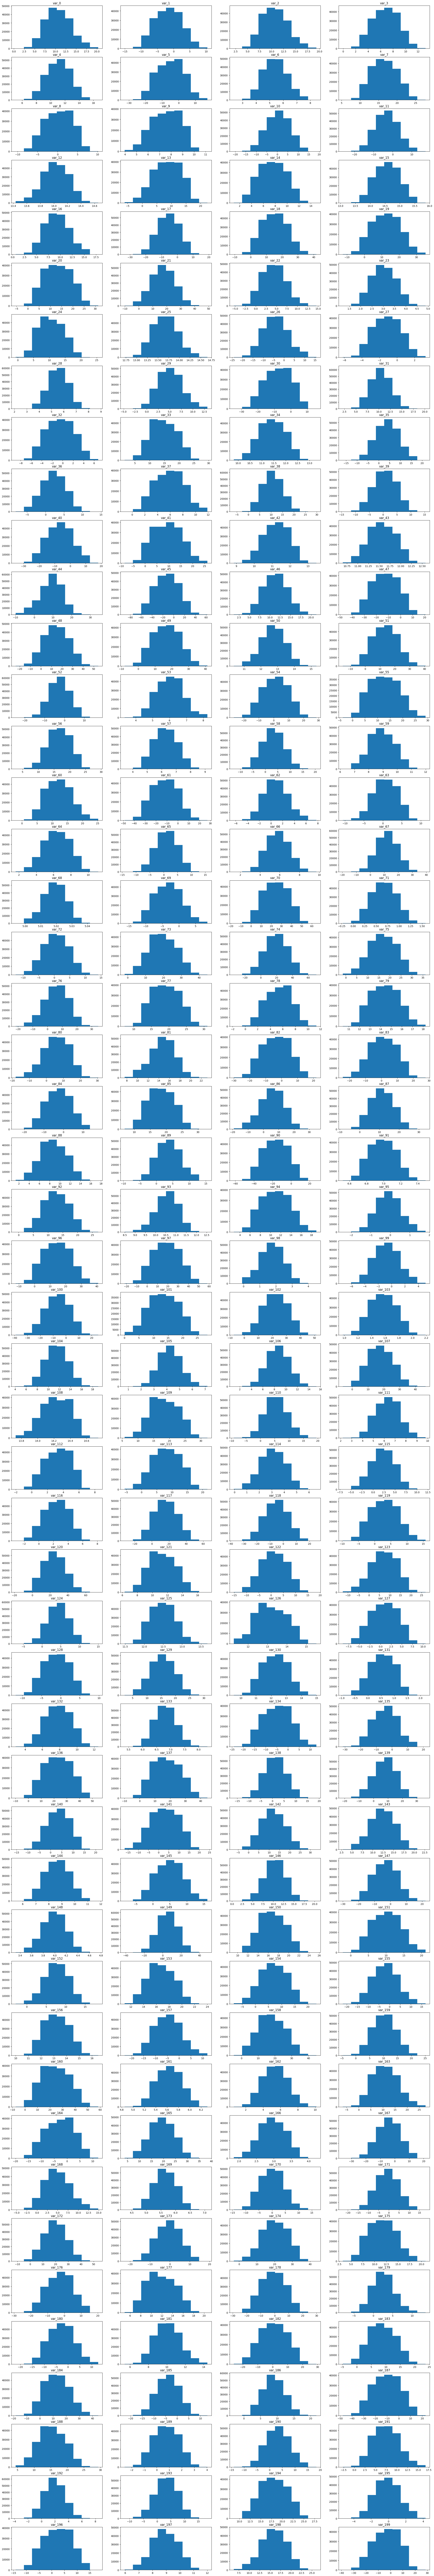

In [14]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_col):
    plt.subplot(50, 4, i + 1)
    plt.hist(df[col]) 
    plt.title(col)


<Axes: >

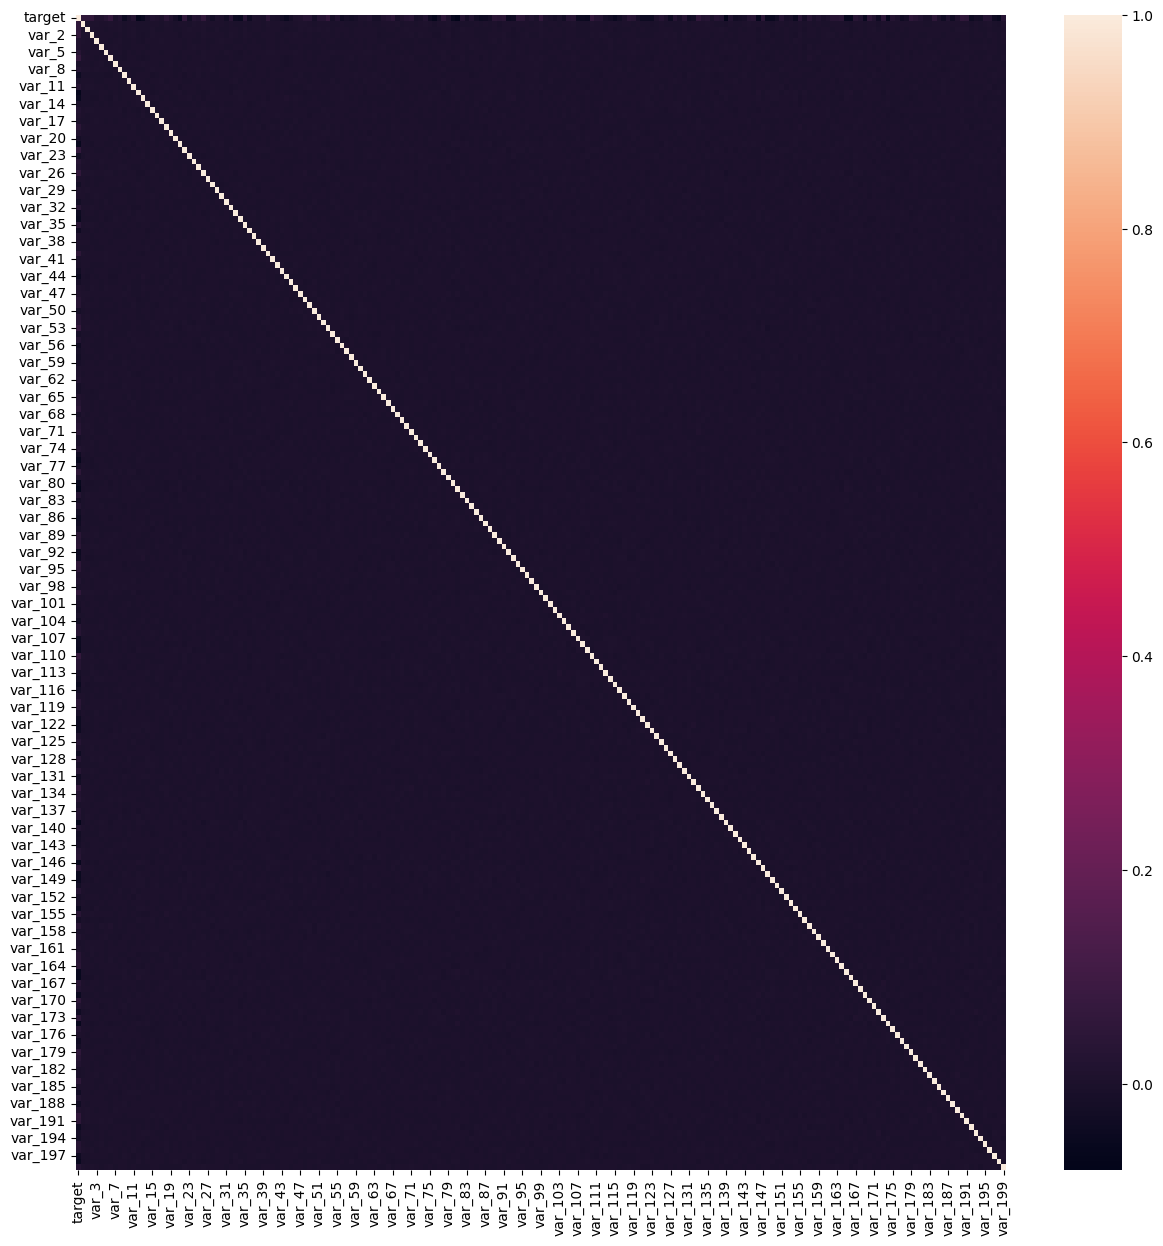

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

### Observation
- All independent features are normaly distributed
- From above both plots we are clearly see that most of the feature is follow a normal distribution and some feature are very close to the noramal distribution so we not need to use feature transformation technique.
- All independent features are uncorrelated with each other 
- All values are lies betweeen 0 to 0.2

<Axes: xlabel='var_15', ylabel='var_95'>

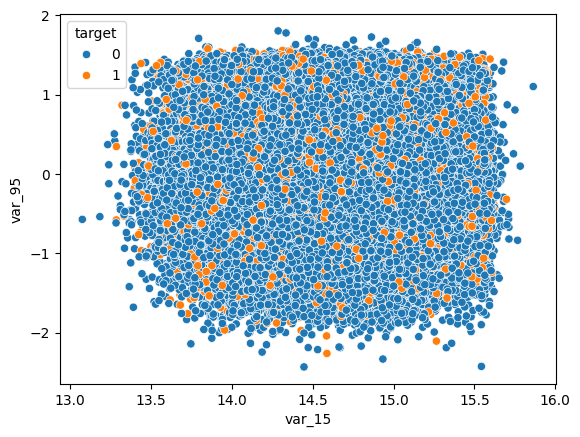

In [16]:
sns.scatterplot(x="var_15", y="var_95", hue="target", data=df)


### Outliers Analysis

In [ ]:
def feature_boxplot(df, columns):
    
    fig, ax = plt.subplots(10,10,figsize=(18,24))
    plt.title("Outliers")
    i=0
    for col in columns:
        i += 1
        plt.subplot(10,10,i)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=9)
        plt.tick_params(axis='x', labelsize=7, pad= -7)
    plt.show()

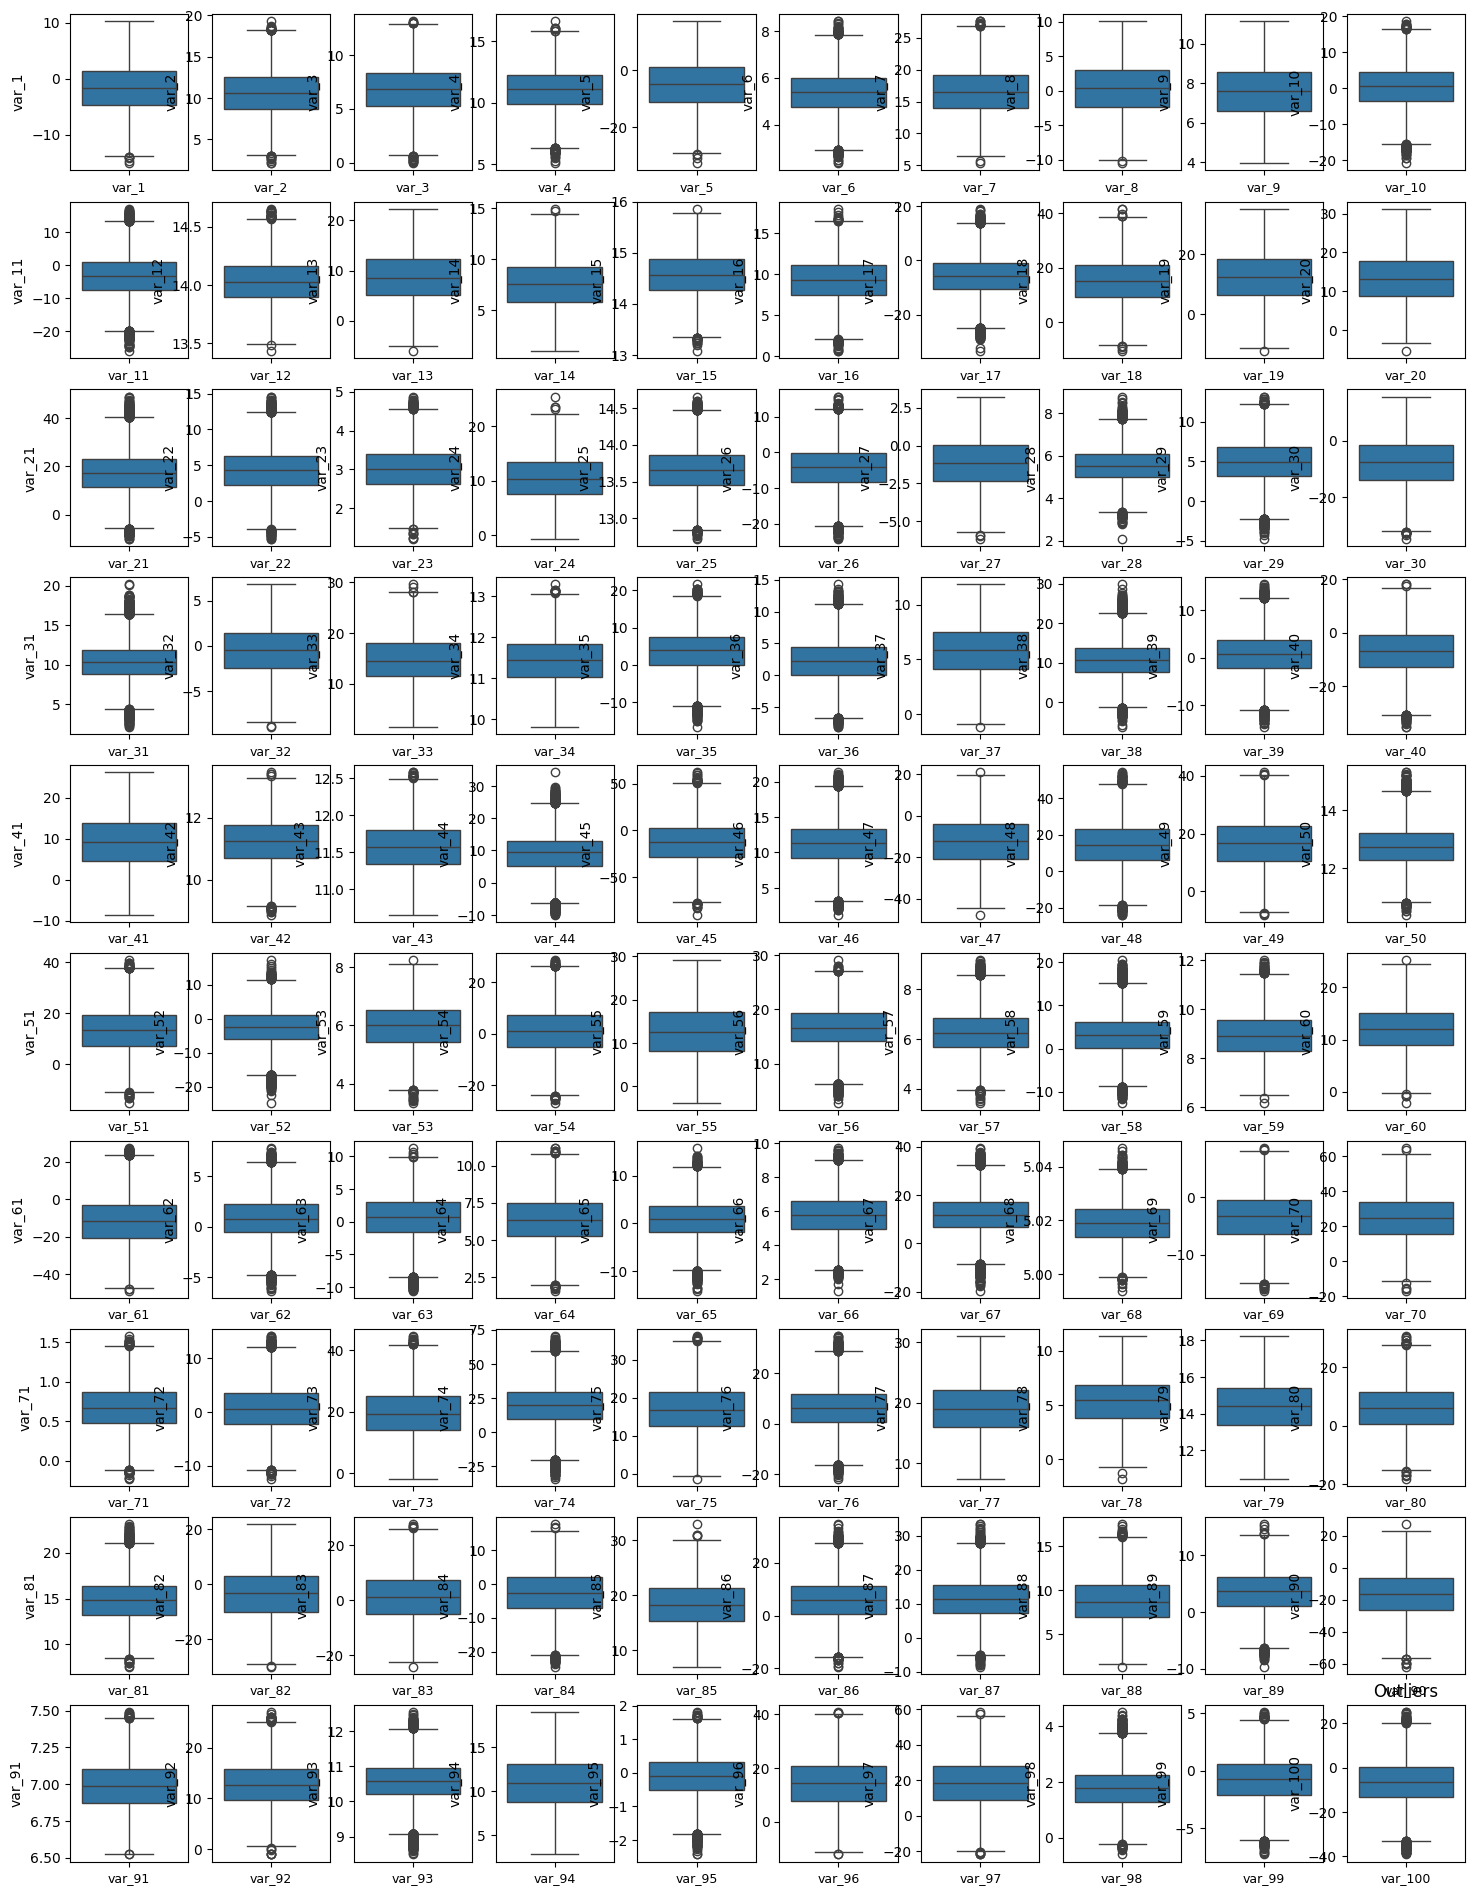

In [18]:
columns=df.columns.values[2:102]
feature_boxplot(df,columns)

### DISTRIBUTION OF MEAN AND STANDARD DEVIATION OF THE DATA

In [8]:
import warnings
warnings.filterwarnings('ignore')

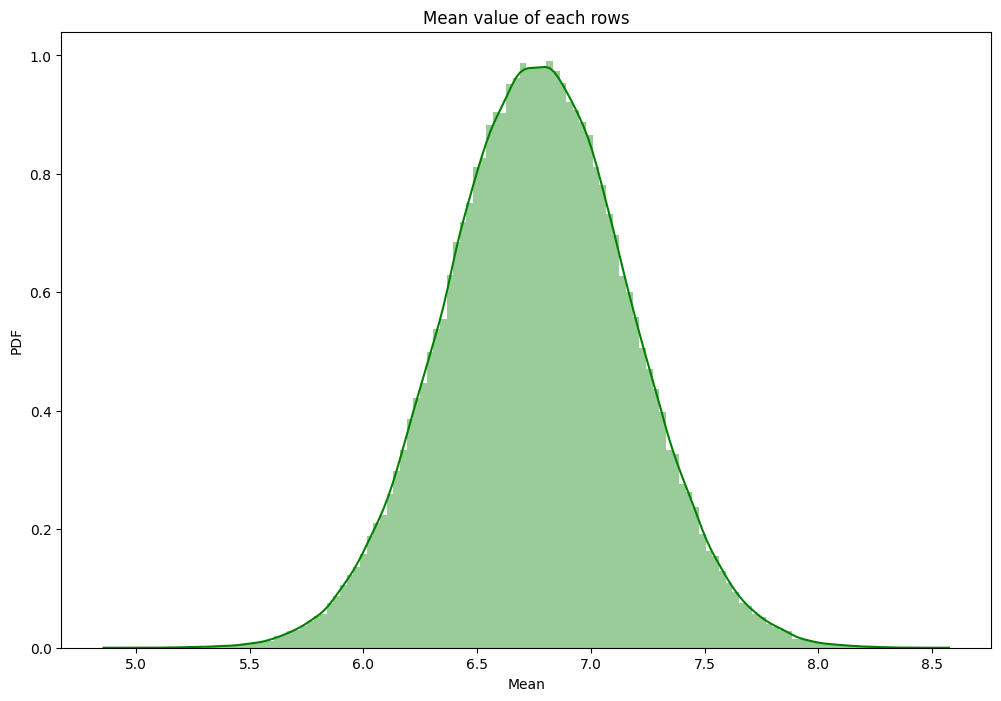

In [10]:
plt.figure(figsize=(12,8))
plt.title("Mean value of each rows")
plt.xlabel('Mean')
plt.ylabel("PDF")
sns.distplot(df[df.columns.values[1:]].mean(axis=1),color='green',kde=True,bins=120)
plt.show()

### Observation
- From the above graph looks like guassian distribution with mean value 6.73
- From above graph we can say that around 80% feature mean lies between 6.5 to 7.0

#### Distribution of standard deviation

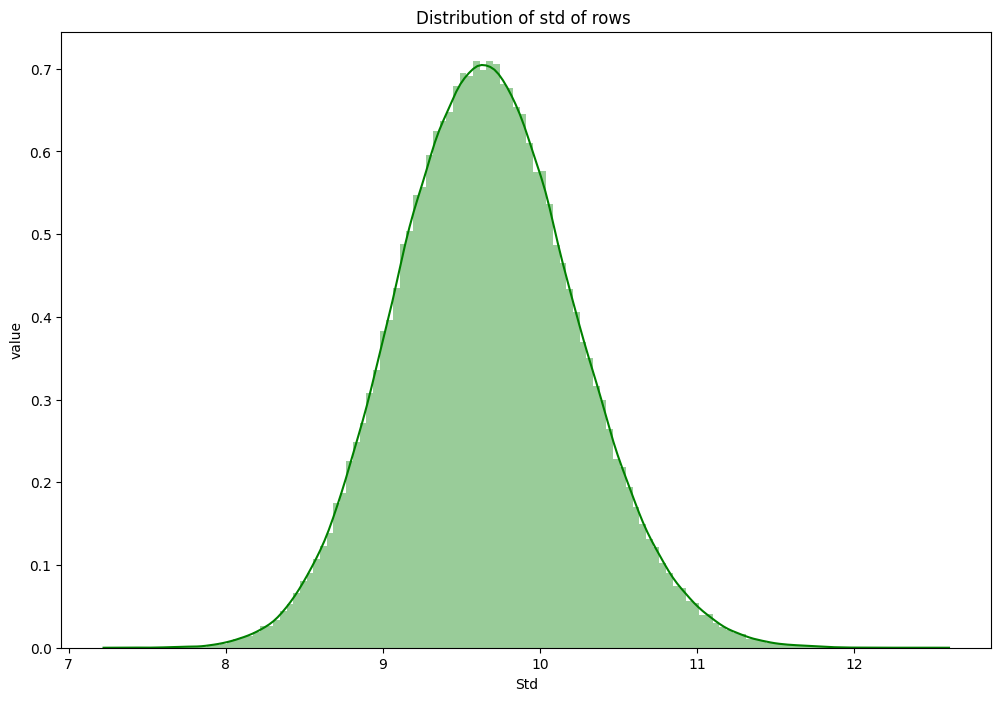

In [14]:
plt.figure(figsize=(12,8))
plt.title("Distribution of std of rows ")
plt.xlabel("Std")
plt.ylabel("value")
sns.distplot(df[df.columns.values[1:]].std(axis=1),color='green',kde=True,bins=120)
plt.show()

### Observation 
- This graph also look like guassian distribution around 60% of feature standard deviation around the range of 9 to 10

# Outlier observation
From the above EDA we seen the feature are very close to the normal distribution as well as distance between point is very less so we are not impute the outlier we are use scaling to robust the outlier


# Feature Scaling

### Robust Scaling
- Here we are use robust scaling because the data set contain the outlier but feature is follow a normal distribution
- robust scaler is similar to normalization but it insted uses the interquatile range, so that is robust to outlier

In [9]:
df1=df.copy()

In [10]:
from sklearn.preprocessing import RobustScaler
scaling=RobustScaler()
df1[df1.columns.values[1:]]=scaling.fit_transform(df1[df1.columns.values[1:]])

# Sampling


In [11]:
# SMOTE Method
from imblearn.over_sampling import SMOTE
y =df1['target']
X =df1.drop(['target'],axis=1)
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X, y)


In [14]:
# ADASYN Method
from imblearn.over_sampling import ADASYN
AS=ADASYN(random_state=0)
X_res1,y_res1=AS.fit_resample(X,y)
print(X_res1.shape,y_res1.shape)

(355887, 200) (355887,)


In [15]:
print(X_res.shape,y_res.shape)
y_res.value_counts()

(359804, 200) (359804,)


target
0    179902
1    179902
Name: count, dtype: int64

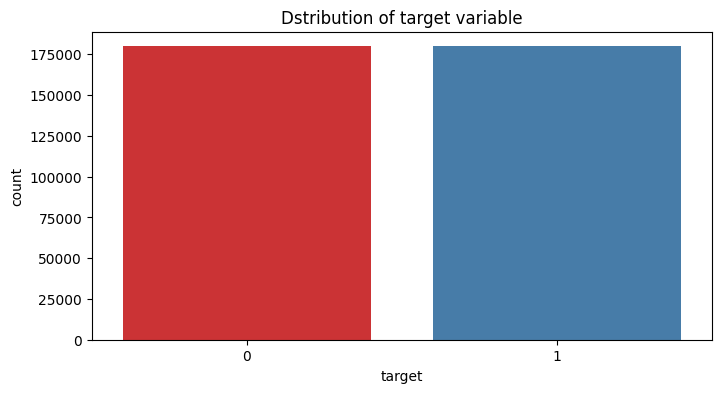

In [27]:
plt.figure(figsize=(8,4))
plt.title("Dstribution of target variable")
sns.countplot(x=y_res,palette='Set1')
plt.show()

# Modling 

In [13]:
# splitting dataframe into tain and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)


# Model 1: LogesticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)



LogisticRegression()

In [30]:
y_pred1=LR.predict(x_test)

In [31]:
from sklearn.metrics import f1_score,recall_score,accuracy_score,confusion_matrix, classification_report

In [32]:
acc=accuracy_score(y_test,y_pred1)
f1score=f1_score(y_test,y_pred1)
recal=recall_score(y_test,y_pred1)
Cm=confusion_matrix(y_test,y_pred1)
cr=classification_report(y_test,y_pred1)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.7993496477258515 
 Flscore=  0.8011403545015081 
 Recal Score=  0.8098513114662805 
 Condusion matrix = [[28437  7610]
 [ 6829 29085]] 
 classification_report=                precision    recall  f1-score   support

           0       0.81      0.79      0.80     36047
           1       0.79      0.81      0.80     35914

    accuracy                           0.80     71961
   macro avg       0.80      0.80      0.80     71961
weighted avg       0.80      0.80      0.80     71961



In [33]:
result=pd.DataFrame(index=['Acuuracy','f1_score'])
result['LogesticRegression']=[acc,f1score]
result

,LogesticRegression
Acuuracy,0.79935
f1_score,0.80114


# Model 2: Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [35]:
y_pred2=gnb.predict(x_test)

In [36]:
acc=accuracy_score(y_test,y_pred2)
f1score=f1_score(y_test,y_pred2)
recal=recall_score(y_test,y_pred2)
Cm=confusion_matrix(y_test,y_pred2)
cr=classification_report(y_test,y_pred2)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.871861147010186 
 Flscore=  0.8603111602611686 
 Recal Score=  0.7906387481205102 
 Condusion matrix = [[34345  1702]
 [ 7519 28395]] 
 classification_report=                precision    recall  f1-score   support

           0       0.82      0.95      0.88     36047
           1       0.94      0.79      0.86     35914

    accuracy                           0.87     71961
   macro avg       0.88      0.87      0.87     71961
weighted avg       0.88      0.87      0.87     71961



In [37]:
result['GausianNavie']=[acc,f1score]
result

,LogesticRegression,GausianNavie
Acuuracy,0.79935,0.871861
f1_score,0.80114,0.860311


# Model 3: RandomForestClassifer

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
y_pred3=rfc.predict(x_test)

In [40]:
acc=accuracy_score(y_test,y_pred3)
f1score=f1_score(y_test,y_pred3)
recal=recall_score(y_test,y_pred3)
Cm=confusion_matrix(y_test,y_pred3)
cr=classification_report(y_test,y_pred3)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.9027111907838968 
 Flscore=  0.898985672442899 
 Recal Score=  0.8674333129141839 
 Condusion matrix = [[33807  2240]
 [ 4761 31153]] 
 classification_report=                precision    recall  f1-score   support

           0       0.88      0.94      0.91     36047
           1       0.93      0.87      0.90     35914

    accuracy                           0.90     71961
   macro avg       0.90      0.90      0.90     71961
weighted avg       0.90      0.90      0.90     71961



In [41]:
result['Random']=[acc,f1score]
result

,LogesticRegression,GausianNavie,Random
Acuuracy,0.79935,0.871861,0.902711
f1_score,0.80114,0.860311,0.898986


# Model 4: Bagging 


In [ ]:
# It is not working for large data so i reduced the dataset
import pandas as pd
X_reduced = x_train.sample(50000, random_state=0)
y_reduced = y_train.loc[X_reduced.index]

In [43]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
LR=LogisticRegression()

model_bagg=BaggingClassifier(estimator=KNN,n_estimators=20) 
model_bagg.fit(X_reduced,y_reduced) ## fitting the model



BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)

In [46]:
y_pred4=model_bagg.predict(x_test)

In [47]:
acc=accuracy_score(y_test,y_pred4)
f1score=f1_score(y_test,y_pred4)
recal=recall_score(y_test,y_pred4)
Cm=confusion_matrix(y_test,y_pred4)
cr=classification_report(y_test,y_pred4)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.4990758883284001 
 Flscore=  0.6658447276940904 
 Recal Score=  1.0 
 Condusion matrix = [[    0 36047]
 [    0 35914]] 
 classification_report=                precision    recall  f1-score   support

           0       0.00      0.00      0.00     36047
           1       0.50      1.00      0.67     35914

    accuracy                           0.50     71961
   macro avg       0.25      0.50      0.33     71961
weighted avg       0.25      0.50      0.33     71961



In [48]:
result['Bagging']=[acc,f1score]
result

,LogesticRegression,GausianNavie,Random,Bagging
Acuuracy,0.79935,0.871861,0.902711,0.499076
f1_score,0.80114,0.860311,0.898986,0.665845


# DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier      
dt=DecisionTreeClassifier()             
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred5=dt.predict(x_test)

In [51]:
acc=accuracy_score(y_test,y_pred5)
f1score=f1_score(y_test,y_pred5)
recal=recall_score(y_test,y_pred5)
Cm=confusion_matrix(y_test,y_pred5)
cr=classification_report(y_test,y_pred5)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.7777268242520254 
 Flscore=  0.7871051896021616 
 Recal Score=  0.8233001058083199 
 Condusion matrix = [[26398  9649]
 [ 6346 29568]] 
 classification_report=                precision    recall  f1-score   support

           0       0.81      0.73      0.77     36047
           1       0.75      0.82      0.79     35914

    accuracy                           0.78     71961
   macro avg       0.78      0.78      0.78     71961
weighted avg       0.78      0.78      0.78     71961



In [52]:
result['DecisionTreeClassifier']=[acc,f1score]
result

,LogesticRegression,GausianNavie,Random,Bagging,DecisionTreeClassifier
Acuuracy,0.79935,0.871861,0.902711,0.499076,0.777727
f1_score,0.80114,0.860311,0.898986,0.665845,0.787105


# XGBClassifier

In [53]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train,y_train)
y_pred=xgb_r.predict(x_test)

In [54]:
y_pred6=xgb_r.predict(x_test)

In [55]:
acc=accuracy_score(y_test,y_pred6)
f1score=f1_score(y_test,y_pred6)
recal=recall_score(y_test,y_pred6)
Cm=confusion_matrix(y_test,y_pred6)
cr=classification_report(y_test,y_pred6)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.8950820583371548 
 Flscore=  0.894180635757134 
 Recal Score=  0.8882051567633792 
 Condusion matrix = [[32512  3535]
 [ 4015 31899]] 
 classification_report=                precision    recall  f1-score   support

           0       0.89      0.90      0.90     36047
           1       0.90      0.89      0.89     35914

    accuracy                           0.90     71961
   macro avg       0.90      0.90      0.90     71961
weighted avg       0.90      0.90      0.90     71961



In [58]:
result['XGBClassifier']=[acc,f1score]
result

,LogesticRegression,GausianNavie,Random,Bagging,DecisionTreeClassifier,XGBClassifier
Acuuracy,0.79935,0.871861,0.902711,0.499076,0.777727,0.895082
f1_score,0.80114,0.860311,0.898986,0.665845,0.787105,0.894181


In [59]:
result['XGBClassifier']=[acc,f1score]
result

,LogesticRegression,GausianNavie,Random,Bagging,DecisionTreeClassifier,XGBClassifier
Acuuracy,0.79935,0.871861,0.902711,0.499076,0.777727,0.895082
f1_score,0.80114,0.860311,0.898986,0.665845,0.787105,0.894181


# Observation 
- from this report I conclude that Random forest classifer is having more acuuracy i select his model
- But this result is for Robust scaling and Smote oversampled data So now i will check for the immbalenced and ADASYN sampling method

# Check for Imbalanced Data

In [23]:
# imbalenced data
Xim=df.drop('target',axis=1)
yim=df['target']

In [25]:
from sklearn.model_selection import train_test_split
x_train_im,x_test_im,y_train_im,y_test_im=train_test_split(Xim,yim,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
RFCimm=RandomForestClassifier()
RFCimm.fit(x_train_im,y_train_im)


RandomForestClassifier()

In [26]:
y_pred_imm=RFCimm.predict(x_test_im)

In [27]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report,confusion_matrix
acc=accuracy_score(y_test_im,y_pred_imm)
f1score=f1_score(y_test_im,y_pred_imm)
recal=recall_score(y_test_im,y_pred_imm)
Cm=confusion_matrix(y_test_im,y_pred_imm)
cr=classification_report(y_test_im,y_pred_imm)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.8976 
 Flscore=  0.0004880429477794046 
 Recal Score=  0.000244081034903588 
 Condusion matrix = [[35903     0]
 [ 4096     1]] 
 classification_report=                precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       1.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.95      0.50      0.47     40000
weighted avg       0.91      0.90      0.85     40000



In [28]:
res=pd.DataFrame(index=["Acuracy","f1_score"])
res['RFC_imbalenced']=[acc,f1score]
res

,RFC_imbalenced
Acuracy,0.897600
f1_score,0.000488


# check for ADASYN over samping method

In [31]:
from sklearn.model_selection import train_test_split
x_train_ADASYN,x_test_ADASYN,y_train_ADSYN,y_test_ADSYN=train_test_split(X_res1,y_res1,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
RFC_ADASYN = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
RFC_ADASYN.fit(x_train_ADASYN,y_train_ADSYN)


RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [32]:
y_pred_ADASYN=RFC_ADASYN.predict(x_test_ADASYN)

In [33]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report,confusion_matrix
acc=accuracy_score(y_test_ADSYN,y_pred_ADASYN)
f1score=f1_score(y_test_ADSYN,y_pred_ADASYN)
recal=recall_score(y_test_ADSYN,y_pred_ADASYN)
Cm=confusion_matrix(y_test_ADSYN,y_pred_ADASYN)
cr=classification_report(y_test_ADSYN,y_pred_ADASYN)
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.7821517884739667 
 Flscore=  0.7822252183927417 
 Recal Score=  0.7896781511413583 
 Condusion matrix = [[27824  8089]
 [ 7417 27848]] 
 classification_report=                precision    recall  f1-score   support

           0       0.79      0.77      0.78     35913
           1       0.77      0.79      0.78     35265

    accuracy                           0.78     71178
   macro avg       0.78      0.78      0.78     71178
weighted avg       0.78      0.78      0.78     71178



In [34]:
res["RFC_ADASYN"]=[acc,f1score]
res

,RFC_imbalenced,RFC_ADASYN
Acuracy,0.897600,0.782152
f1_score,0.000488,0.782225


# SMOTE

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc_smote=RandomForestClassifier(n_estimators=10)
rfc_smote.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [15]:
y_pred_smote=rfc_smote.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,y_pred_smote)
f1score=f1_score(y_test,y_pred_smote)
recal=recall_score(y_test,y_pred_smote)
Cm=confusion_matrix(y_test,y_pred_smote)
cr=classification_report(y_test,y_pred_smote
                         )
print("Accuracy= ",acc ,"\n", "Flscore= ",f1score,"\n","Recal Score= ",recal,"\n","Condusion matrix =",Cm,"\n","classification_report= ",cr)

Accuracy=  0.902377676797154 
 Flscore=  0.8986042752190292 
 Recal Score=  0.8667650498412875 
 Condusion matrix = [[33807  2240]
 [ 4785 31129]] 
 classification_report=                precision    recall  f1-score   support

           0       0.88      0.94      0.91     36047
           1       0.93      0.87      0.90     35914

    accuracy                           0.90     71961
   macro avg       0.90      0.90      0.90     71961
weighted avg       0.90      0.90      0.90     71961



In [40]:
res["RFC_smote"]=[acc,f1score]
res

,RFC_imbalenced,RFC_ADASYN,RFC_smote
Acuracy,0.897600,0.782152,0.904226
f1_score,0.000488,0.782225,0.900482


In [60]:
from sklearn.metrics import roc_auc_score
print("Test AUC: {}".format(roc_auc_score(y_test,y_pred_smote)))

Test AUC: 0.9025762934640446


# Observation
RandomForestClassifier was the best performing model of the 6 (Logistic Regression, Random Forest Classifier , Gaussian Naive Bayes,DecisionTreeClassifier,BaggingClassifier,XGBClassifier), but also the  bit slower compared Gaussian Naive Bayes.

The main metric used during the modelling was the Accuracy and f1 score. RFC also returned good results in other metrics such as Recall and Precission, where these are very important in an imbalanced dataset (which one is more importan will depend on specific cases, uses and policies).

As next steps, a deeper look into the outliers would be a good idea. I tried to use a 3 times the Standard Deviation approach to identify outliers but it was deleting the whole dataset... Also, I didn't perform any data reduction since the models could handle all the dataset. However, experimenting with this would also be a good next step.

 # Deployment

In [17]:
import pickle
with open('model_RFR.pkl', 'wb') as f:
    pickle.dump(rfc_smote, f)
    f.close

# Prediction

In [55]:
df1.head(20)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,0.523831,...,0.686540,0.085795,0.331306,1.344064,-0.530228,1.103135,0.672394,-0.074077,0.571886,0.297368
2,0,-0.445003,-0.186541,0.395469,0.347815,-0.221094,-0.350556,1.260908,-0.356903,-1.010902,...,-0.046079,0.560891,-0.112102,-0.304303,0.764938,1.656951,-1.050161,-0.463036,-0.286149,0.200436
3,0,0.124444,-0.089159,-0.429020,0.120748,0.620850,0.247176,0.370517,-0.296912,-1.190060,...,0.195359,-0.598020,-0.574591,-0.351340,1.065039,-0.548868,-0.627542,1.047370,0.480670,-0.385163
4,0,-0.159803,0.020439,0.604761,-0.061074,0.491579,0.600549,0.449607,0.541684,1.117206,...,-0.726076,0.499102,-0.996298,1.031426,-0.979782,-0.669600,0.178488,0.458709,0.487211,-0.373372
5,0,0.221067,-0.116444,0.534497,0.586770,-0.061461,0.692284,-0.690440,-0.238666,0.607303,...,-1.471054,-0.171120,1.645802,-0.525875,-0.632038,0.601960,-0.709460,0.655576,-0.791766,-0.120948
6,0,0.298384,0.250031,-0.324335,-0.825205,0.011459,-0.262813,0.656521,-0.848927,-0.907929,...,0.863013,-0.205654,0.791950,-0.572591,0.078345,0.378543,0.788073,0.168668,-1.191764,-0.024316
7,0,0.704694,-1.046141,0.869110,0.251952,-1.031960,0.467141,0.246013,1.137679,0.888749,...,1.541587,-0.183382,1.014359,0.428690,1.087277,-0.102435,0.212720,0.399478,-1.717026,0.392648
8,0,1.296909,0.664188,0.883105,-0.388368,-0.970100,0.906888,-0.755849,-1.215600,-0.681527,...,-0.274369,1.699894,-0.127104,-0.351927,-0.654737,-0.910513,-0.409495,-0.515256,0.844706,0.477701
9,0,0.460941,0.587400,-0.443832,-0.447619,1.049665,-0.944545,0.549340,0.074470,-0.050421,...,-0.409790,-0.236905,-0.419571,0.051973,-0.655282,0.309654,1.378208,-0.727266,0.071652,1.063924


In [21]:

input = df1.iloc[13, 1:].values.tolist()

predicted_target = rfc_smote.predict([input])

if predicted_target[0]==0:
    print("Predicted Target: ",predicted_target[0]," (Customer will not make transcation)")
else:
    print("Predicted Target: ",predicted_target[0]," (Customer will  make transcation)")



Predicted Target:  1  (Customer will  make transcation)


In [ ]:
df1.to_csv("cleaned_data.csv")